<a href="https://colab.research.google.com/github/shivangi-975/Data-Preparation-for-ML/blob/main/Various_Correalation_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yellowbrick

### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
diabetes = pd.read_csv('datasets/diabetes.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Calculating correlation matrix

In [ ]:
diabetes_corr = diabetes.corr()

diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Plotting heatmap

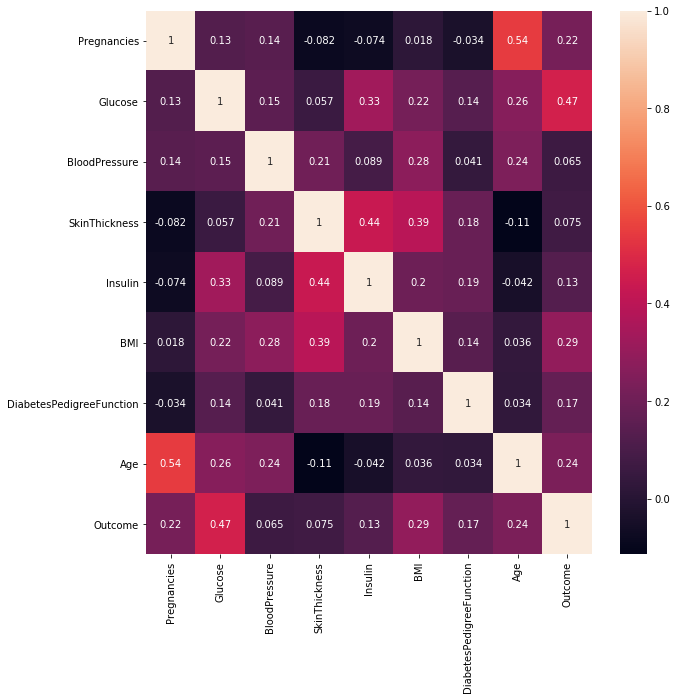

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_corr, annot=True)
plt.show()

##### In the above matrix we can figure out that the correlation score is higher for Insulin and BMI. So now we are going to use FeatureCorrelation function to visualize how 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' are correlated with 'Age'.

##### We are taking 4 columns 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' as features and 'Age' as label.

In [ ]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]

Y = diabetes['Age']

In [ ]:
feature_names = X.columns

feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

### Visualizing feature correlations
https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html

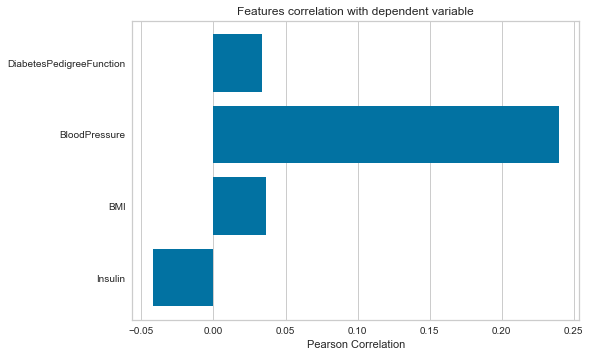

In [ ]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

#### Showing the correlation score

In [ ]:
visualizer.scores_

array([-0.04216295,  0.03624187,  0.23952795,  0.03356131])

In [ ]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

#### We can see that the scores are same as we got in above correlation matrix

In [ ]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Insulin,-0.042163
1,BMI,0.036242
2,BloodPressure,0.239528
3,DiabetesPedigreeFunction,0.033561


### Split dataset into features and labels

In [ ]:
X = diabetes.drop('Outcome', axis=1)

Y = diabetes['Outcome']

In [ ]:
feature_names = X.columns

feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Visualizing feature correlations

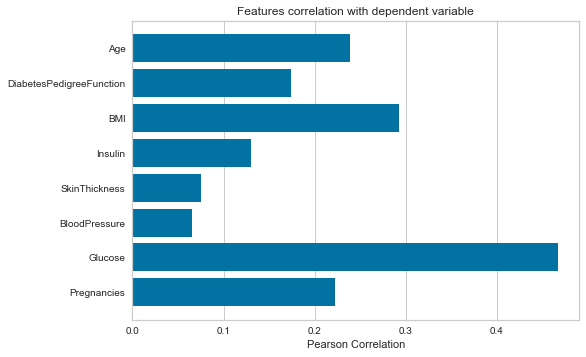

In [ ]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [ ]:
visualizer.scores_

array([0.22189815, 0.4665814 , 0.06506836, 0.07475223, 0.13054795,
       0.29269466, 0.17384407, 0.23835598])

In [ ]:
visualizer.features_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [ ]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.221898
1,Glucose,0.466581
2,BloodPressure,0.065068
3,SkinThickness,0.074752
4,Insulin,0.130548
5,BMI,0.292695
6,DiabetesPedigreeFunction,0.173844
7,Age,0.238356


In [ ]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

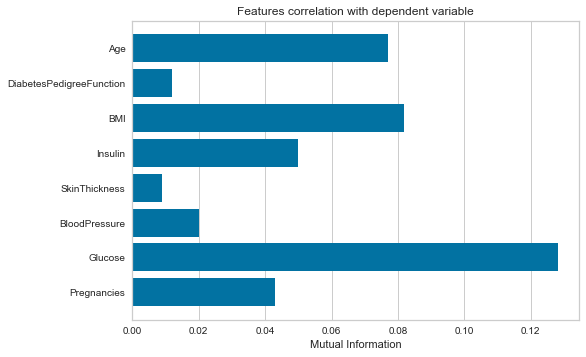

In [ ]:
discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True

visualizer = FeatureCorrelation(method='mutual_info-classification',
                                labels=feature_names)

visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)

visualizer.poof()

In [ ]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.042854
1,Glucose,0.128141
2,BloodPressure,0.019959
3,SkinThickness,0.008760
4,Insulin,0.049821
5,BMI,0.081901
6,DiabetesPedigreeFunction,0.012049
7,Age,0.076876


#### This time we are selecting for which feature we want the feature correlation plot

In [ ]:
feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

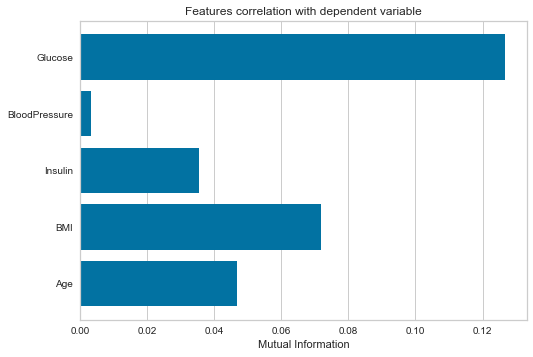

In [ ]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot)

visualizer.fit(X, Y, random_state=0)

visualizer.poof()

#### Here we want features in sorted form

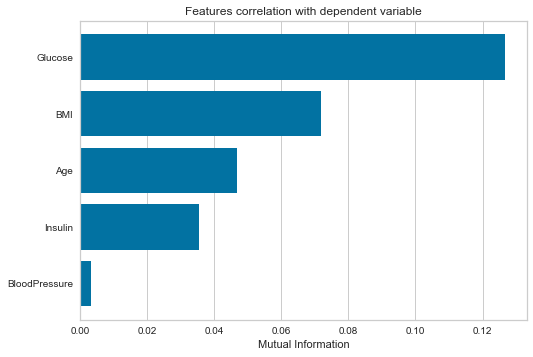

In [ ]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot, sort=True)

visualizer.fit(X, Y, random_state=0)
visualizer.poof()

In [ ]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,BloodPressure,0.003267
1,Insulin,0.035542
2,Age,0.046833
3,BMI,0.071820
4,Glucose,0.126805
